In [2]:
import matplotlib.pyplot as plt 

In [3]:
from main import PSO_algorithm
from FitnessEvaluators import SphereEvaluator, RastriginEvaluator, RosenbrockEvaluator
from InertiaStrategys import ConstantIntertia, LinearDescentInertia

In [4]:
def plot_cenario(X, Y, evaluator, inertiaStrategy, constantIntertiaValue, lowerBoundLD, upperBoundLD):
    plt.figure()
    plt.plot(X,Y)

    if type(inertiaStrategy).__name__ == 'LinearDescentInertia':
        plt.title(f'Convergence graphic for {type(evaluator).__name__} and {type(inertiaStrategy).__name__} with bounds {lowerBoundLD, upperBoundLD}')
    else:
        plt.title(f'Convergence graphic for {type(evaluator).__name__} and {type(inertiaStrategy).__name__} using constant intertia: {constantIntertiaValue}')
    plt.xlabel('Iterations')
    plt.ylabel('Best fitness')
    plt.show()

In [5]:
NUMBER_ITERATIONS = 500
LEFT_BOUND = -100
RIGHT_BOUND = 100
DIMENSION = 30
POPULATION_SIZE = 100

constantIntertiaValues = [0.7, 0.8, 0.9]
upperBoundLinearDesc = [1, 0.9, 0.8]
lowerBoundLinearDesc = [0.3, 0.4, 0.5]

evaluators = [SphereEvaluator(), RastriginEvaluator(), RosenbrockEvaluator()]
inertiaStrategies = [LinearDescentInertia(0.4, 0.9, NUMBER_ITERATIONS), ConstantIntertia(0)]

In [6]:
def avarage(lst): 
    return sum(lst) / len(lst) 

def execute_X_times(X_TIMES, NUMBER_ITERATIONS, LEFT_BOUND, RIGHT_BOUND, DIMENSION, POPULATION_SIZE, evaluator, inertiaStrategy):
    Y_results = []
    X_results = []

    for i in range(X_TIMES):
        X, Y = PSO_algorithm(NUMBER_ITERATIONS, LEFT_BOUND, RIGHT_BOUND, DIMENSION, POPULATION_SIZE, evaluator, inertiaStrategy)
        if i == 0:
            X_results = X

        Y_results.append(Y)

    Y_mean = []

    for i in range(len(Y_results[0])):
        Y_values = [curr_result[i] for curr_result in Y_results]

        Y_mean.append(avarage(Y_values))
    
    print(Y_results)
    print(Y_mean)
    return X_results, Y_mean

[[63799.7363468126, 79634.40911960969, 117832.6592911124, 90022.98821883346, 122978.45532798297, 126900.1298420234, 101592.32305168165, 98889.99394434105, 96565.91160323088, 101703.27797893164, 93580.99656228276, 100290.7611991924, 108767.84776777802, 85900.39509141634, 91671.9227232064, 89198.10801582734, 80380.58426908281, 85938.2080709409, 90168.68129978496, 87710.7111310158, 91206.44987055258, 95111.9652183813, 90522.8632648481, 95330.88574238375, 92258.12895252409, 78759.36860439839, 84623.6657158253, 76181.11586259863, 86823.81780504686, 80725.24492957503, 90230.31292141147, 74104.22626903874, 77582.27344046159, 85813.0902218471, 83858.98828520405, 76057.48311449202, 78085.75940134893, 82133.20441075708, 83997.60297359178, 86855.17100372429, 87319.09907075792, 84297.78100217237, 77541.86880143415, 82243.21861395807, 76106.8820188587, 83679.366366551, 81386.81285517974, 74976.7592673156, 76631.17882564562, 76851.15386247796, 70398.50049019793, 74503.083405782, 66883.38834876419, 7

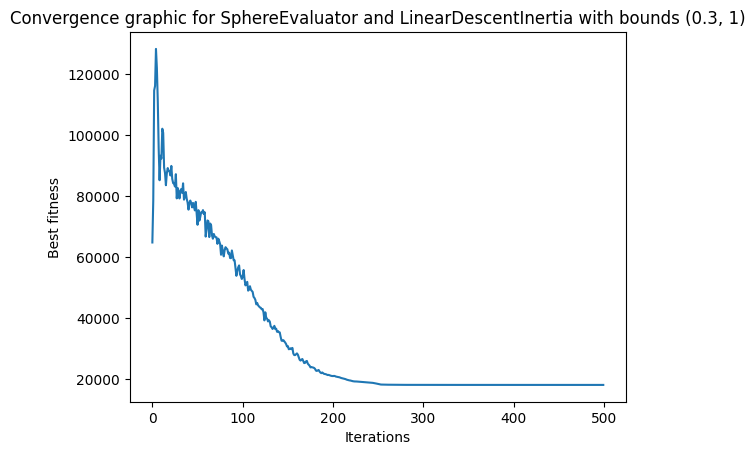

[[68633.69506161648, 70159.02430863545, 131382.63400596997, 102512.76060109875, 131470.26002169974, 139312.2549515523, 120073.66511922817, 108660.15798425421, 97301.67669801836, 106010.29117922047, 103071.29395888715, 105565.06130136322, 110794.05806810033, 116472.38587187517, 88439.38795263688, 94486.7284961825, 86049.81352714926, 91110.23289432509, 100677.04757628063, 96876.25585229261, 95595.7644373365, 94052.13340246954, 91263.60434753732, 91017.92948031546, 98649.30509228, 94968.95933774699, 99336.91939707374, 98266.48907976584, 89535.12234818967, 94011.74599230623, 87904.36252671924, 90709.62659008268, 90714.0110996828, 90275.51150692384, 78115.54740209412, 85568.98058608345, 89829.05261533572, 91737.39555467443, 93045.02795168251, 91956.84740535502, 91817.68057995217, 78046.15313296727, 92524.09838449613, 78828.37725137199, 90400.19869082318, 73679.50741579023, 84518.48548843757, 88534.50616105882, 79117.60724550052, 83173.12575716621, 86843.21251259824, 87750.50345561077, 86400

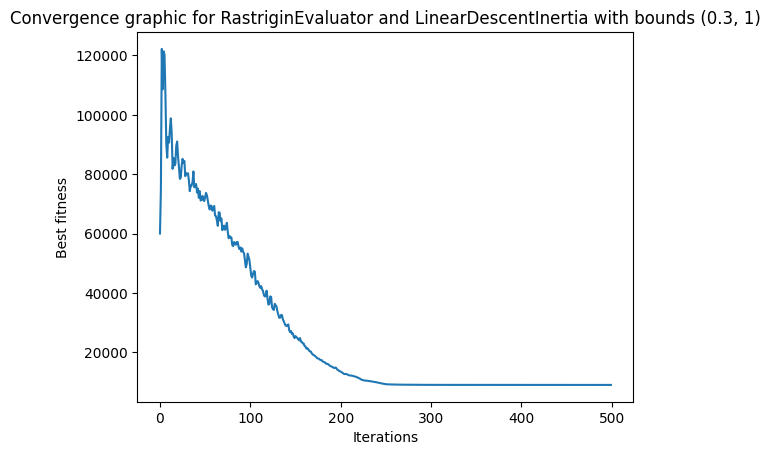

[[28870936065.048603, 38393848060.17911, 102392566798.31876, 102807183392.17035, 69040633273.0833, 99431934342.38808, 87475508810.45955, 74596833610.87657, 54339127836.36771, 62047507677.2113, 66128556489.953415, 64072615445.37868, 51517838667.229195, 66856908857.09857, 47557719606.950264, 46497331025.829994, 57881678577.317116, 63466427719.02212, 51798187197.28253, 56841923727.40552, 47056042248.144585, 43378299965.32736, 48035477318.84684, 42215601519.72579, 53292205455.67414, 48586374586.490715, 57561156706.2931, 52796556947.178276, 52931261460.698204, 48885144641.209236, 41217725846.956635, 35023329991.128586, 44168920260.31092, 48863490879.971176, 43562375289.90132, 35560776293.87756, 30243147087.44966, 37846992732.672615, 38185778406.698166, 49479552849.71581, 40982306475.5117, 41406063606.7507, 43526157403.72915, 36159095624.29907, 40765824836.01212, 39523438128.82456, 37832364766.7976, 38832510356.72882, 34066845773.55321, 37854947841.49671, 35092744024.834465, 39755871499.7909

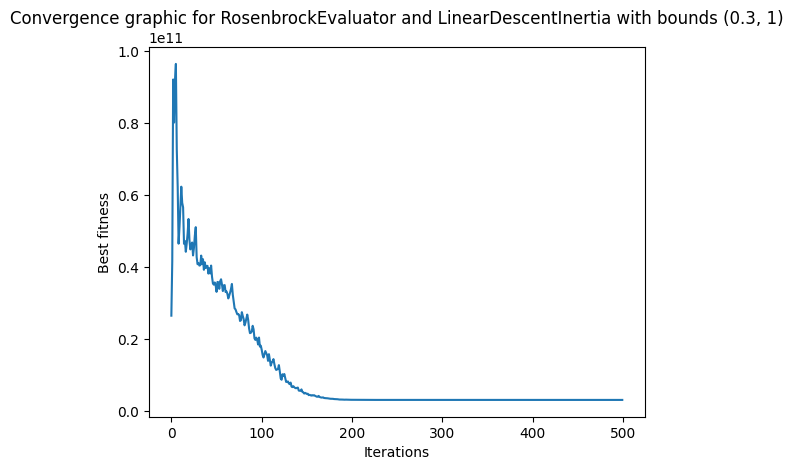

[[61919.65363791921, 75572.49288278676, 110482.09100505765, 103358.66725601851, 94321.40933585449, 114053.57674580712, 92554.04544314487, 102013.16782270433, 95293.85141458569, 98515.44339679042, 97963.15446323814, 103004.41415456067, 82968.86732405657, 76532.43553328022, 99793.88430539254, 97709.92295906704, 80284.12769029413, 81127.00566492433, 88948.55358422393, 73802.2156865153, 80593.94825824142, 90736.64958995671, 93606.0408808677, 91981.21127972288, 93258.80699664187, 85870.71821570207, 74233.7248512511, 86433.11020788597, 87746.32416097891, 92785.33786424244, 69117.30549331069, 93226.82929065921, 83082.9853959104, 86169.58660050471, 89793.12296207566, 86171.69774717274, 80577.97013455209, 89333.95876420777, 80001.0180626016, 77170.98288614668, 86562.17063329792, 74837.52294138393, 87672.43697273647, 82556.16602103187, 79881.29186134093, 78740.32368461778, 83829.7371754607, 80207.6591227464, 83702.3544823812, 73019.63760687338, 66801.6334473849, 76512.25366467252, 72131.86323340

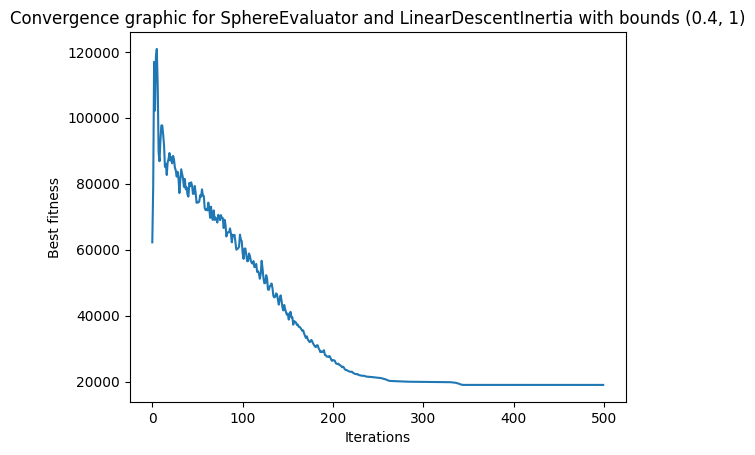

[[57022.500277142404, 65591.04203699277, 125392.55249284179, 113695.17739113673, 138254.58795542555, 116789.14808426132, 118888.00052439675, 99721.21925977303, 83833.95957077414, 94458.7739539248, 92457.31244404659, 94973.6367229906, 95947.02920381333, 83480.94430412623, 86881.82684998542, 85646.6949400561, 93100.64118624764, 93341.35808890166, 90764.24817415644, 94387.13223435135, 79725.88262488184, 85744.66556577351, 86446.92263806725, 82623.08201517822, 87394.68972267683, 75167.53229055772, 89417.11403240605, 71371.66557354186, 89523.10877003106, 79499.208276549, 81190.3719627667, 84492.28948583144, 69900.7135409945, 75012.71374364987, 79581.18240048573, 67514.52086717446, 85432.69546452575, 86299.9000392757, 85842.99390420892, 78729.04357305447, 71397.47041603542, 82914.88246839723, 63685.505950815095, 79188.06052118623, 86288.0486248742, 70889.8184964451, 74558.2759855197, 72511.2575017857, 77125.74602530812, 70271.46464197454, 69416.7467211514, 80570.13818616541, 71697.9908930228

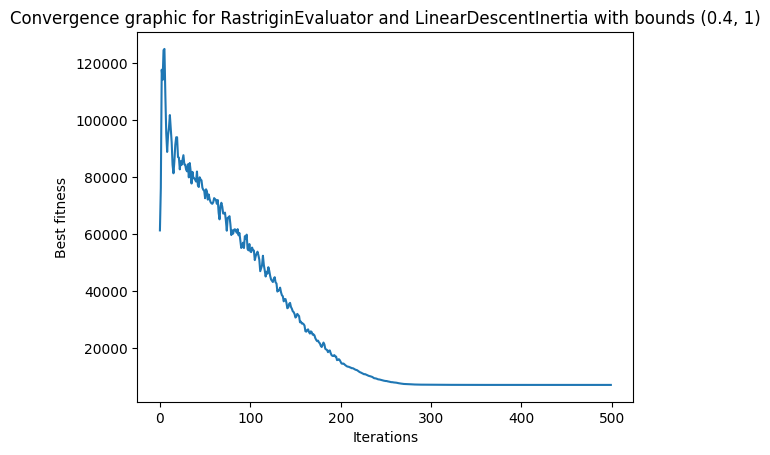

[[30705140783.430832, 50141412288.81985, 85339462687.7417, 53225667386.7123, 97355436478.67012, 109148438922.19783, 84335403558.83185, 70605323060.98883, 55162049909.82534, 60266973306.88809, 61694454832.97186, 59823048699.13508, 66549707764.87176, 54414016261.38236, 52986754660.675, 49531183456.26188, 57659354949.04227, 43938408668.22767, 50603908276.56796, 54266411960.27623, 45085062641.723434, 63139034683.87393, 37941175194.40895, 37558483957.11766, 43366194685.89297, 42491083610.414925, 51207250484.11023, 52005951831.58033, 43448019659.6592, 51840775393.35074, 44356534890.517914, 35060797120.37091, 51130160644.698685, 53783157655.34076, 46592032455.47897, 53000012676.53471, 35118688365.17991, 30525696870.40144, 37333994796.81835, 38735041747.785034, 41273291390.580956, 58364581376.51589, 48672202169.055176, 49652232315.72301, 46088307221.24126, 38368854854.644966, 39442218283.87811, 40203607661.09479, 37801714345.53105, 32084538467.26784, 42642164755.24853, 39752535433.56941, 20403

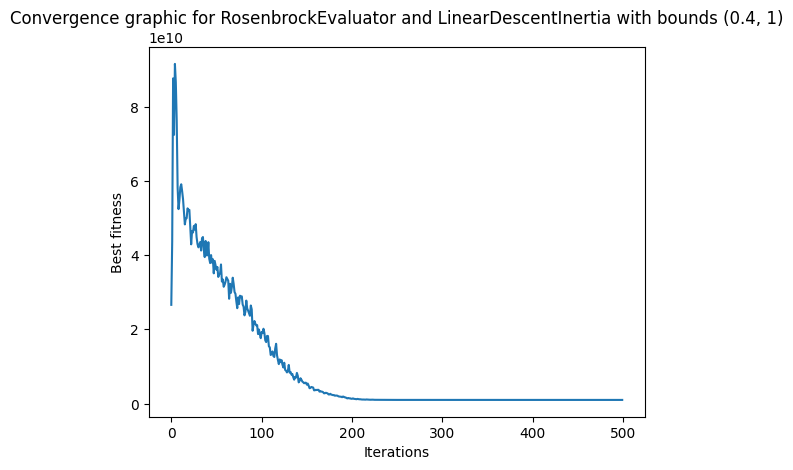

KeyboardInterrupt: 

In [7]:
for inertiaStrategy in inertiaStrategies:
    for constantIntertiaValue in constantIntertiaValues:
        for upperBoundLD in upperBoundLinearDesc:
            for lowerBoundLD in lowerBoundLinearDesc:
                for evaluator in evaluators:

                    if type(inertiaStrategy).__name__=='LinearDescentInertia':
                        inertiaStrategy = LinearDescentInertia(lowerBoundLD, upperBoundLD, NUMBER_ITERATIONS)
                        X, Y = execute_X_times(10, NUMBER_ITERATIONS, LEFT_BOUND, RIGHT_BOUND, DIMENSION, POPULATION_SIZE, evaluator, inertiaStrategy)
                        plot_cenario(X,Y, evaluator, inertiaStrategy, constantIntertiaValue, lowerBoundLD, upperBoundLD)
                    else:
                        inertiaStrategy = ConstantIntertia(constantIntertiaValue)
                        X, Y = execute_X_times(10, NUMBER_ITERATIONS, LEFT_BOUND, RIGHT_BOUND, DIMENSION, POPULATION_SIZE, evaluator, inertiaStrategy)
                        plot_cenario(X,Y, evaluator, inertiaStrategy, constantIntertiaValue, lowerBoundLD, upperBoundLD)